- Objective calculate linear regression coefficients

- Calcul du coefficient de determination R2


### Simple Linear Regression

Load dataset

In [33]:
import pandas as pd 
import numpy as np
Salary = pd.read_csv('Salary_Data.csv')
Salary 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Split the data into 70% train 30% test

In [34]:
from sklearn.model_selection import train_test_split

X = Salary.drop(['Salary'],axis = 1)
y = Salary['Salary']

X_train, X_test, y_train, y_test = train_test_split(Salary.YearsExperience, Salary.Salary, test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((21,), (9,))

Represent the data points of Salary function of YearsExperience

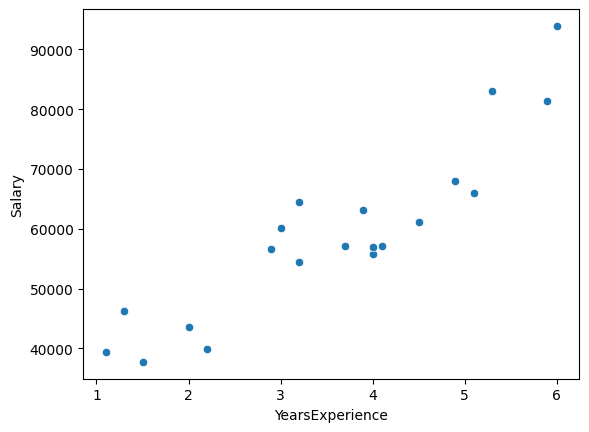

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt 


sns.scatterplot(data = Salary.iloc[:20,:], x = 'YearsExperience', y = 'Salary' )


plt.show()

Calculate the correlation of Salary and YearExperience

In [36]:
corr = Salary['YearsExperience'].corr(Salary['Salary'])
print('Correlation entre YearsExperience & Salary :', corr)

Correlation entre YearsExperience & Salary : 0.9782416184887599


Calculate the coefficients of the regression line based on the least squares method (moindres carres)

In [37]:
coeff = (np.mean(X_train*y_train) - (np.mean(X_train) * np.mean(y_train)))  / np.var(X_train)

intercept = np.mean(y_train)  - coeff * np.mean(X_train)
coeff

9360.261286193645

In [38]:
X_train

22     7.9
5      2.9
16     5.1
8      3.2
14     4.5
23     8.2
20     6.8
1      1.3
29    10.5
6      3.0
4      2.2
18     5.9
19     6.0
9      3.7
7      3.2
25     9.0
3      2.0
0      1.1
21     7.1
15     4.9
12     4.0
Name: YearsExperience, dtype: float64

In [39]:
X_train.to_numpy().reshape(-1,1)

array([[ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

Calculate the coefficients of the regression line based on scikit-learn library

In [40]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()

model.fit(X_train.to_numpy().reshape(-1,1), y_train)


b0 = model.coef_ 
b1 = model.intercept_

b0, b1

(array([9360.26128619]), 26777.391341197625)

Linear Regression line

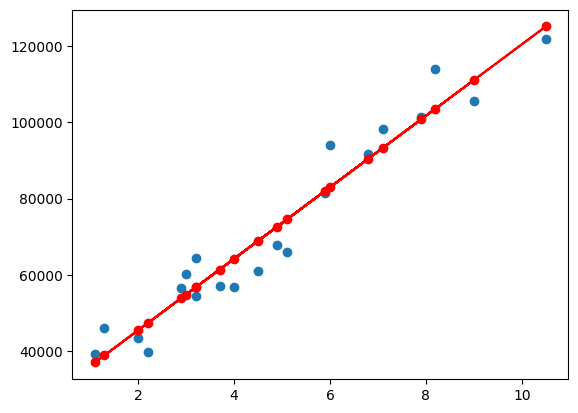

In [41]:
F = b0 * X_train + b1
plt.scatter(X_train, y_train )
plt.scatter(X_train, F, c='r')
plt.plot(X_train, F, c='r')
plt.show()


Calculate R2 using scikit-learn

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test.to_numpy().reshape(-1,1))

r2 = r2_score(y_test.to_numpy().reshape(-1,1), y_pred)
r2

0.9740993407213511

After training and doing evaluation on our model, we will make prediction on our model new year experiece example

In [50]:
new_year_experience_exp = 5
model.predict(np.array([[new_year_experience_exp]]))

array([73578.69777217])

The Salary for "5" years experience will be "73578.69777217"